# Requirements

This code requires you to have record your games (game states) in a JSON format.
<br> And then run the 'JSON to DF' notebook to get appropriate DataFrames.
<br> And then run the Analysis notebook (for FFA and teams) to get the final aggregated CSVs

## Import Libraries

In [93]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read all CSVs and create a main_df

In [26]:
main_df = pd.DataFrame()

for a in ['donothing_mcts', 'random_mcts', 'simple_mcts', 'rhea', 'mcts', 'mcts_safe', 'mcts_obs', 'mcts_om', 'mcts_safe_obs']:
    for m in ['ffa_-1', 'ffa_1', 'ffa_2', 'team_-1', 'team_1', 'team_2']:

        print(a, m)
        if a == 'mcts_obs':
            if m == 'ffa_-1':
                m = 'ffa_0'
            if m == 'team_-1':
                m = 'team_0'

        file = '/analysis/dataframe.csv'
        path = a + '/' + m + file
        
        df = pd.read_csv(path)
        df.drop('Unnamed: 0', axis=1, inplace=True)   
        
        df['agent'] = a
        df['mode'] = m
        
        main_df = pd.concat([main_df, df])


donothing_mcts ffa_-1
donothing_mcts ffa_1
donothing_mcts ffa_2
donothing_mcts team_-1
donothing_mcts team_1
donothing_mcts team_2
random_mcts ffa_-1
random_mcts ffa_1
random_mcts ffa_2
random_mcts team_-1
random_mcts team_1
random_mcts team_2
simple_mcts ffa_-1
simple_mcts ffa_1
simple_mcts ffa_2
simple_mcts team_-1
simple_mcts team_1
simple_mcts team_2
rhea ffa_-1
rhea ffa_1
rhea ffa_2
rhea team_-1
rhea team_1
rhea team_2
mcts_safe ffa_-1
mcts_safe ffa_1
mcts_safe ffa_2
mcts_safe team_-1
mcts_safe team_1
mcts_safe team_2
mcts_obs ffa_-1
mcts_obs ffa_1
mcts_obs ffa_2
mcts_obs team_-1
mcts_obs team_1
mcts_obs team_2
mcts_om ffa_-1
mcts_om ffa_1
mcts_om ffa_2
mcts_om team_-1
mcts_om team_1
mcts_om team_2
mcts_safe_obs ffa_-1
mcts_safe_obs ffa_1
mcts_safe_obs ffa_2
mcts_safe_obs team_-1
mcts_safe_obs team_1
mcts_safe_obs team_2


In [184]:
main_df

,dead_tick,player,how_many_dead,death_how,game_no,valid_moves,bombs,power_ups,tiles_explored,players_killed,wood_bombed,powers_bombed,bomb_chained,killed_by,total_steps,agent,mode,pk
0,576,13,1,collapsing_wall,1,100.000000,0,0,1,0,0,0,0,0,0,donothing_mcts,ffa_-1,donothing_mctsffa_-11
1,646,11,1,bombed,1,75.895317,1,0,41,0,0,0,0,10,325,donothing_mcts,ffa_-1,donothing_mctsffa_-11
2,726,12,1,collapsing_wall,1,57.851240,1,0,13,0,0,0,0,0,256,donothing_mcts,ffa_-1,donothing_mctsffa_-11
3,726,10,1,winner,1,79.752066,3,0,33,0,0,0,0,0,401,donothing_mcts,ffa_-1,donothing_mctsffa_-11
4,576,13,1,collapsing_wall,2,100.000000,0,0,1,0,0,0,0,0,0,donothing_mcts,ffa_-1,donothing_mctsffa_-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,726,12,2,tie,49,79.476584,3,1,23,0,2,0,0,0,424,mcts,team_2,mctsteam_249
10796,724,11,1,suicide,50,54.820937,2,0,14,0,1,0,0,11,234,mcts,team_2,mctsteam_250
10797,726,13,1,collapsing_wall,50,50.688705,1,0,14,0,0,0,0,0,222,mcts,team_2,mctsteam_250
10798,726,10,2,tie,50,88.567493,5,1,35,0,4,0,0,0,510,mcts,team_2,mctsteam_250


Utility stuff

In [159]:
df = main_df.copy()

In [41]:
df['player'] = df['player'].astype('category')
df['agent'] = df['agent'].astype('category')
df['mode'] = df['mode'].astype('category')

In [314]:
ll = df.loc[(df.player==13) & (df.death_how=='winner')].groupby(['agent', 'mode'])['game_no'].count().sort_values().reset_index()

In [325]:
colos = ll['mode'].map({'ffa_-1':'#957DAD', 'ffa_2': '#D291BC', 'ffa_1': '#E0BBE4', 'ffa_0': '#FFDFD3', 'team_-1': '#8A8985', 'team_2': '#91B383', 'team_1': '#C5C18B', 'team_0': '#DDD3AC'}).values


# Wins for all agents 

<ipython-input-351-ccb98b261ea6>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ll['agent'].values)


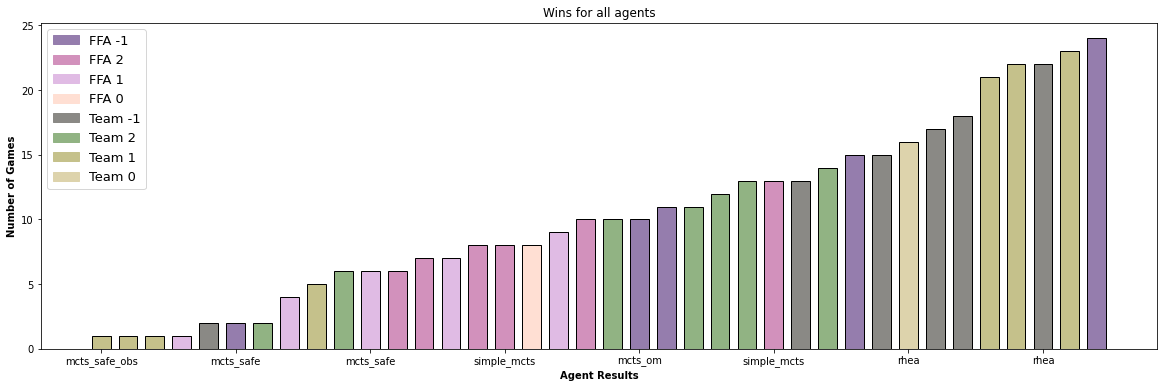

In [351]:
import matplotlib.patches as mpatches

patch1 = mpatches.Patch(color='#957DAD', label='FFA -1')
patch2 = mpatches.Patch(color='#D291BC', label='FFA 2')
patch3 = mpatches.Patch(color='#E0BBE4', label='FFA 1')
patch4 = mpatches.Patch(color='#FFDFD3', label='FFA 0')

patch5 = mpatches.Patch(color='#8A8985', label='Team -1')
patch6 = mpatches.Patch(color='#91B383', label='Team 2')
patch7 = mpatches.Patch(color='#C5C18B', label='Team 1')
patch8 = mpatches.Patch(color='#DDD3AC', label='Team 0')



# set width of bars
barWidth = 0.7
 
# set heights of bars
bars1 = ll['game_no'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Wins for all agents')


# Make the plot
ax.bar(r1, bars1, color=colos, width=barWidth, edgecolor='black')


# Add xticks on the middle of the group bars
ax.set_xlabel('Agent Results', fontweight='bold')
ax.set_ylabel('Number of Games', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(bars1))], ['Do Nothing', 'MCTS', 'Random', 'RHEA', 'Simple Player'])

#plt.xticks([r + barWidth for r in range(len(bars1))], [ll['agent'].values])
ax.set_xticklabels(ll['agent'].values)

# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13, handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8])
plt.show()

<AxesSubplot:xlabel='agent,mode'>

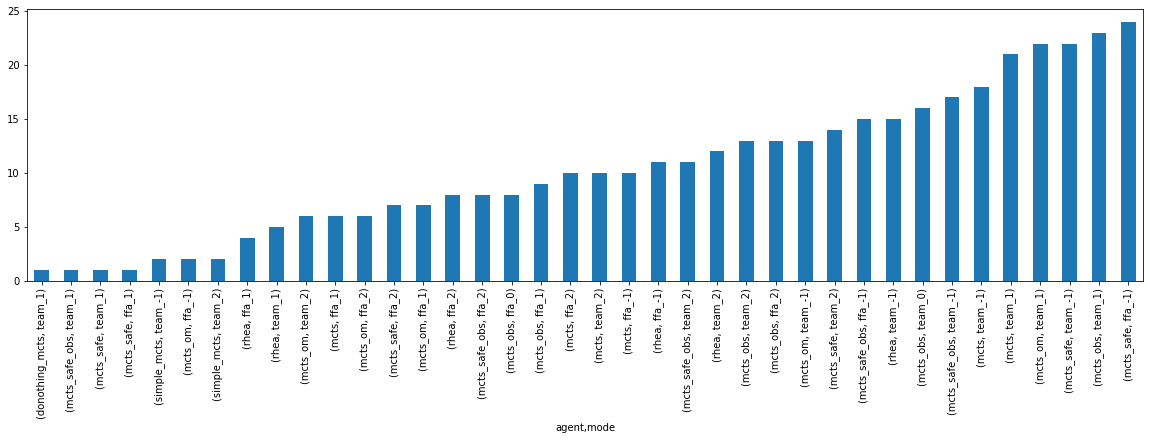

In [160]:
df.loc[(df.player==13) & (df.death_how=='winner')].groupby(['agent', 'mode'])['game_no'].count().sort_values().plot.bar(figsize=(20,5))



# Number of other agents each agent killed

In [188]:
#df.reset_index(inplace=True)
#df['pk'] = df['agent']+df['mode']+df['game_no'].astype(str)
for i in df.pk.unique():
    st = df.loc[df['pk'] ==i]
    for j in st.index:
        if st.loc[j, 'killed_by']!=0:
            temp = df.loc[(df.pk==i) & (df.player==st.loc[j, 'killed_by']), 'players_killed']
            df.loc[(df.pk==i) & (df.player==st.loc[j, 'killed_by']), 'players_killed'] = temp + 1
            print(st.loc[j, 'killed_by'])


10
10
11
10
11
11
11
11
11
11
10
11
11
12
10
10
10
11
10
11
11
10
10
10
11
11
10
12
12
10
10
10
10
11
11
12
12
10
12
10
11
12
10
12
12
12
10
12
10
11
12
10
12
12
10
11
12
11
11
11
11
12
12
10
10
12
10
10
12
11
12
11
11
11
11
12
12
10
12
12
12
11
10
11
12
12
11
11
12
10
12
12
11
11
10
12
11
12
12
12
12
12
10
12
10
10
12
12
10
12
10
12
10
12
10
10
13
13
13
13
13
13
13
13
13
11
13
13
10
13
12
11
13
12
11
13
10
13
13
13
13
13
12
13
11
13
13
13
13
13
13
13
13
13
13
13
13
11
13
10
13
12
13
11
10
13
13
10
10
13
11
13
10
10
11
13
12
13
12
12
13
10
13
11
11
13
10
10
13
13
13
12
13
13
12
11
13
10
13
12
13
11
12
11
13
13
11
12
13
11
13
11
12
13
12
11
13
11
12
13
11
12
13
13
12
13
13
12
13
10
12
12
10
12
13
13
11
13
10
13
10
13
10
13
13
13
13
12
13
10
13
11
13
11
11
13
12
13
10
10
10
12
13
12
13
12
11
13
12
13
13
10
12
13
12
10
13
13
12
12
12
13
12
10
13
10
13
11
13
12
13
12
13
12
13
10
10
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
11
11
13
13
13
13
11
13
13
13
11
13
13
13
11
13
13
13
13
1

13
13
10
13
13
13
13
10
10
11
13
12
12
13
13
13
13
13
13
13
11
13
13
13
10
13
12
11
11
11
11
11
13
13
13
13
12
13
12
11
11
12
13
13
10
13
12
10
13
11
10
13
12
12
12
12
13
13
12
10
13
12
10
12
13
13
11
13
13
13
11
12
13
12
13
13
12
13
11
13
11
10
13
11
13
11
13
10
13
11
13
11
10
13
12
11
13
13
11
13
12
13
13
11
10
12
13
11
12
13
13
12
13
13
13
11
11
12
10
11
12
10
13
13
13
13
10
12
11
10
12
12
10
13
13
12
13
12
12
12
13
13
12
11
11
11
13
13
13
12
13
12
13
13
13
13
12
10
11
13
12
12
13
13
13
10
13
13
13
13
13
13
13
11
12
12
13
13
13
13
13
10
10
10
13
13
11
13
10
10
13
13
12
12
13
13
13
13
13
12
11
13
10
12
10
10
12
13
13
10
10
13
13
13
13
11
13
13
10
10
12
13
10
10
13
10
10
10
12
10
13
13
11
12
12
12
10
12
13
13
13
11
11
11
13
11
11
10
10
11
11
10
13
10
11
11
13
10
12
11
12
13
13
11
10
13
12
13
12
10
12
11
13
11
13
10
13
13
11
13
11
13
11
11
11
11
13
11
13
11
11
12
11
11
10
13
11
11
10
11
10
11
13
13
11
11
13
13
11
11
13
13
11
11
10
10
13
11
13
13
10
13
13
11
11
12
13
13
11
11
13
13
11
1

In [189]:
df.players_killed.value_counts()

0    7972
1    2243
2     508
3      77
Name: players_killed, dtype: int64

# Do Nothing, Random, Simple Player, RHEA

In [258]:
dd = df.loc[df.agent.isin(['donothing_mcts', 'random_mcts', 'simple_mcts', 'rhea', 'mcts'])]

## FFA Full Observability

In [259]:
dx = dd.loc[dd['mode']=='ffa_-1']

In [260]:
dx

,dead_tick,player,how_many_dead,death_how,game_no,valid_moves,bombs,power_ups,tiles_explored,players_killed,wood_bombed,powers_bombed,bomb_chained,killed_by,total_steps,agent,mode,pk
0,576,13,1,collapsing_wall,1,100.000000,0,0,1,0,0,0,0,0,0,donothing_mcts,ffa_-1,donothing_mctsffa_-11
1,646,11,1,bombed,1,75.895317,1,0,41,0,0,0,0,10,325,donothing_mcts,ffa_-1,donothing_mctsffa_-11
2,726,12,1,collapsing_wall,1,57.851240,1,0,13,0,0,0,0,0,256,donothing_mcts,ffa_-1,donothing_mctsffa_-11
3,726,10,1,winner,1,79.752066,3,0,33,1,0,0,0,0,401,donothing_mcts,ffa_-1,donothing_mctsffa_-11
4,576,13,1,collapsing_wall,2,100.000000,0,0,1,0,0,0,0,0,0,donothing_mcts,ffa_-1,donothing_mctsffa_-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,726,12,1,winner,49,71.212121,2,0,32,0,0,0,0,0,352,mcts,ffa_-1,mctsffa_-149
9796,726,10,2,collapsing_wall,50,69.972452,3,0,23,0,0,0,0,0,329,mcts,ffa_-1,mctsffa_-150
9797,726,11,2,collapsing_wall,50,69.696970,2,0,24,0,0,0,0,0,342,mcts,ffa_-1,mctsffa_-150
9798,726,12,2,collapsing_wall,50,78.925620,3,0,27,0,0,0,0,0,405,mcts,ffa_-1,mctsffa_-150


In [261]:
dx['player'] = dx['player'].astype('category')
dx['agent'] = dx['agent'].astype('category')
dx['mode'] = dx['mode'].astype('category')

<ipython-input-261-49b1f2a833fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['player'] = dx['player'].astype('category')
<ipython-input-261-49b1f2a833fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['agent'] = dx['agent'].astype('category')
<ipython-input-261-49b1f2a833fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

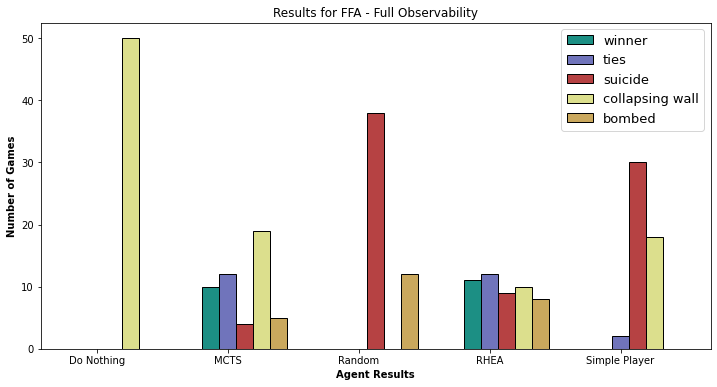

In [246]:
t = dx.loc[dx.player==13].groupby(['agent', 'death_how'])['game_no'].count().reset_index()

# set width of bars
barWidth = 0.13
 
# set heights of bars
bars1 = t.loc[t.death_how=='winner', 'game_no'].values # winner
bars2 = t.loc[t.death_how=='tie', 'game_no'].values
bars3 = t.loc[t.death_how=='suicide', 'game_no'].values
bars4 = t.loc[t.death_how=='collapsing_wall', 'game_no'].values
bars5 = t.loc[t.death_how=='bombed', 'game_no'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))
plt.title('Results for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='winner')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='ties')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='suicide')
plt.bar(r4, bars4, color='#dcdf8d', width=barWidth, edgecolor='black', label='collapsing wall')
plt.bar(r5, bars5, color='#caa85d', width=barWidth, edgecolor='black', label='bombed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Results', fontweight='bold')
plt.ylabel('Number of Games', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Do Nothing', 'MCTS', 'Random', 'RHEA', 'Simple Player'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

<ipython-input-247-4b226cea940d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = dx.loc[dx.player==13].groupby('agent')['bombs', 'wood_bombed', 'players_killed'].mean().reset_index()


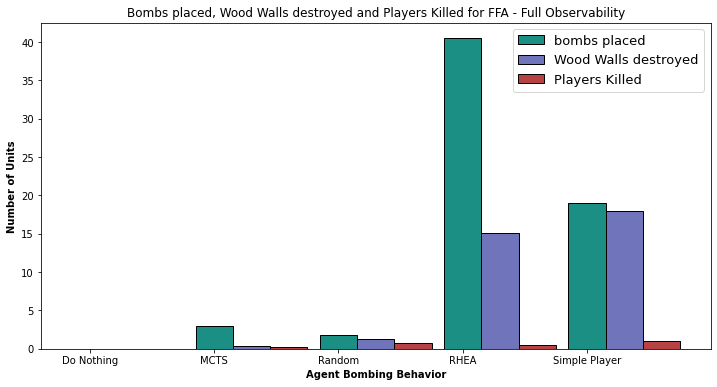

In [247]:
t = dx.loc[dx.player==13].groupby('agent')['bombs', 'wood_bombed', 'players_killed'].mean().reset_index()

# set width of bars
barWidth = 0.3
 
# set heights of bars
bars1 = t['bombs'].values 
bars2 = t['wood_bombed'].values
bars3 = t['players_killed'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
plt.title('Bombs placed, Wood Walls destroyed and Players Killed for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='bombs placed')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='Wood Walls destroyed')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='Players Killed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Bombing Behavior', fontweight='bold')
plt.ylabel('Number of Units', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], ['Do Nothing', 'MCTS', 'Random', 'RHEA', 'Simple Player'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

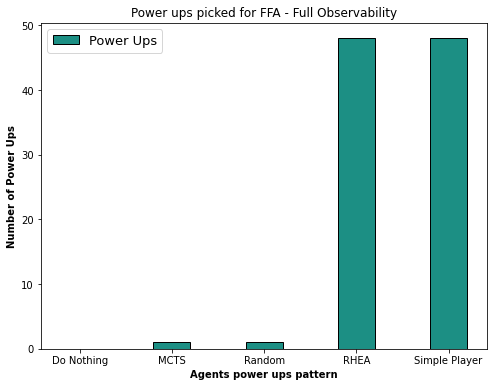

In [248]:
t = dx.loc[dx.player==13].groupby('agent')['power_ups'].sum()

# set width of bars
barWidth = 0.4
 
# set heights of bars
bars1 = t.values 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))

plt.figure(figsize=(8, 6))
plt.title('Power ups picked for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='Power Ups')


# Add xticks on the middle of the group bars
plt.xlabel('Agents power ups pattern', fontweight='bold')
plt.ylabel('Number of Power Ups', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], ['Do Nothing', 'MCTS', 'Random', 'RHEA', 'Simple Player'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

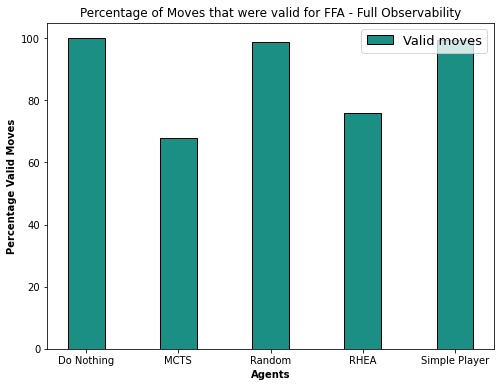

In [249]:
t = dx.loc[dx.player==13].groupby('agent')['valid_moves'].mean()

# set width of bars
barWidth = 0.4
 
# set heights of bars
bars1 = t.values 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))

plt.figure(figsize=(8, 6))
plt.title('Percentage of Moves that were valid for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='Valid moves')


# Add xticks on the middle of the group bars
plt.xlabel('Agents', fontweight='bold')
plt.ylabel('Percentage Valid Moves', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], ['Do Nothing', 'MCTS', 'Random', 'RHEA', 'Simple Player'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

<ipython-input-262-65a67f9a2cb9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = dx.loc[dx.player==13].groupby('agent')['dead_tick', 'total_steps', 'tiles_explored'].mean().reset_index()


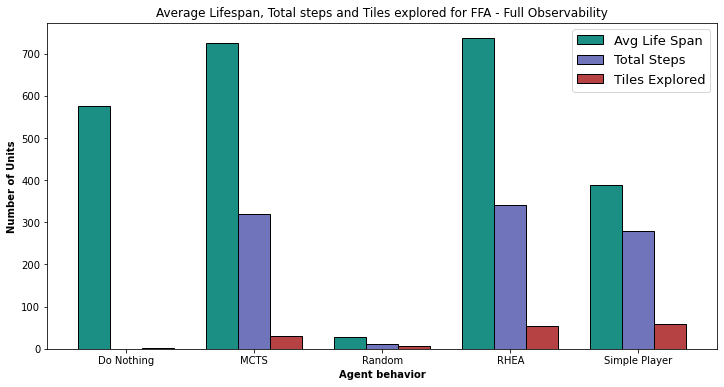

In [262]:
t = dx.loc[dx.player==13].groupby('agent')['dead_tick', 'total_steps', 'tiles_explored'].mean().reset_index()

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = t['dead_tick'].values
bars2 = t['total_steps'].values
bars3 = t['tiles_explored'].values
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


plt.figure(figsize=(12, 6))
plt.title('Average Lifespan, Total steps and Tiles explored for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='Avg Life Span')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='Total Steps')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='Tiles Explored')


# Add xticks on the middle of the group bars
plt.xlabel('Agent behavior', fontweight='bold')
plt.ylabel('Number of Units', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars1))], ['Do Nothing', 'MCTS', 'Random', 'RHEA', 'Simple Player'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

# MCTS Safe & Valid

In [250]:
dd = df.loc[df.agent.isin(['mcts', 'mcts_safe'])]

## FFA Full Observability

In [251]:
dx = dd.loc[dd['mode']=='ffa_-1']

In [252]:
dx['player'] = dx['player'].astype('category')
dx['agent'] = dx['agent'].astype('category')
dx['mode'] = dx['mode'].astype('category')

<ipython-input-252-49b1f2a833fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['player'] = dx['player'].astype('category')
<ipython-input-252-49b1f2a833fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['agent'] = dx['agent'].astype('category')
<ipython-input-252-49b1f2a833fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

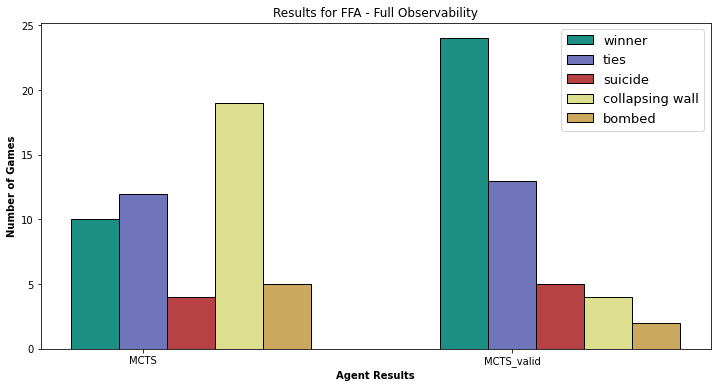

In [253]:
t = dx.loc[dx.player==13].groupby(['agent', 'death_how'])['game_no'].count().reset_index()

# set width of bars
barWidth = 0.13
 
# set heights of bars
bars1 = t.loc[t.death_how=='winner', 'game_no'].values # winner
bars2 = t.loc[t.death_how=='tie', 'game_no'].values
bars3 = t.loc[t.death_how=='suicide', 'game_no'].values
bars4 = t.loc[t.death_how=='collapsing_wall', 'game_no'].values
bars5 = t.loc[t.death_how=='bombed', 'game_no'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))
plt.title('Results for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='winner')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='ties')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='suicide')
plt.bar(r4, bars4, color='#dcdf8d', width=barWidth, edgecolor='black', label='collapsing wall')
plt.bar(r5, bars5, color='#caa85d', width=barWidth, edgecolor='black', label='bombed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Results', fontweight='bold')
plt.ylabel('Number of Games', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MCTS', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

<ipython-input-254-7228d96d5fa3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = dx.loc[dx.player==13].groupby('agent')['bombs', 'wood_bombed', 'players_killed'].mean().reset_index()


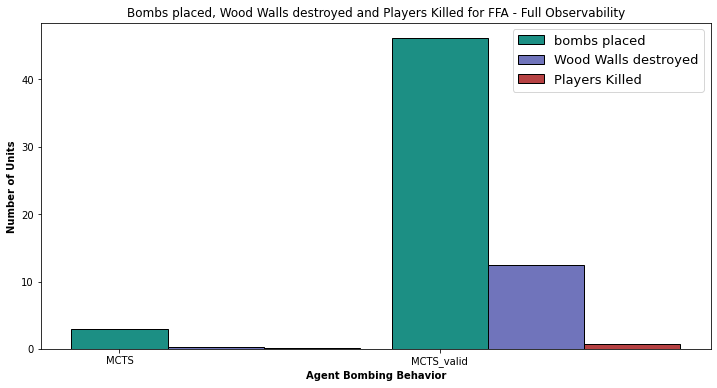

In [254]:
t = dx.loc[dx.player==13].groupby('agent')['bombs', 'wood_bombed', 'players_killed'].mean().reset_index()

# set width of bars
barWidth = 0.3
 
# set heights of bars
bars1 = t['bombs'].values 
bars2 = t['wood_bombed'].values
bars3 = t['players_killed'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
plt.title('Bombs placed, Wood Walls destroyed and Players Killed for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='bombs placed')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='Wood Walls destroyed')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='Players Killed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Bombing Behavior', fontweight='bold')
plt.ylabel('Number of Units', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], ['MCTS', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

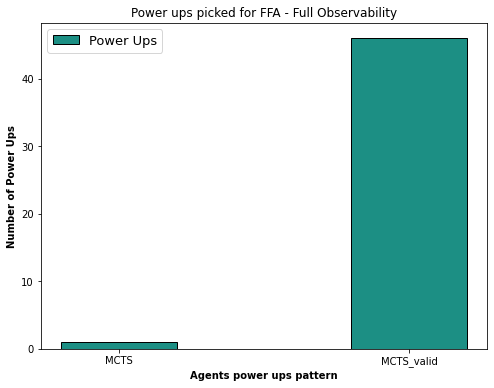

In [255]:
t = dx.loc[dx.player==13].groupby('agent')['power_ups'].sum()

# set width of bars
barWidth = 0.4
 
# set heights of bars
bars1 = t.values 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))

plt.figure(figsize=(8, 6))
plt.title('Power ups picked for FFA - Full Observability')

# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='Power Ups')


# Add xticks on the middle of the group bars
plt.xlabel('Agents power ups pattern', fontweight='bold')
plt.ylabel('Number of Power Ups', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], ['MCTS', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

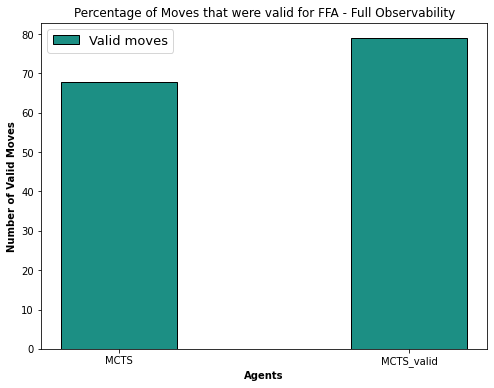

In [256]:
t = dx.loc[dx.player==13].groupby('agent')['valid_moves'].mean()

# set width of bars
barWidth = 0.4
 
# set heights of bars
bars1 = t.values 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))

plt.figure(figsize=(8, 6))
plt.title('Percentage of Moves that were valid for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='Valid moves')


# Add xticks on the middle of the group bars
plt.xlabel('Agents', fontweight='bold')
plt.ylabel('Number of Valid Moves', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], ['MCTS', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

<ipython-input-257-afba071ee1c9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = dx.loc[dx.player==13].groupby('agent')['dead_tick', 'total_steps', 'tiles_explored'].mean().reset_index()


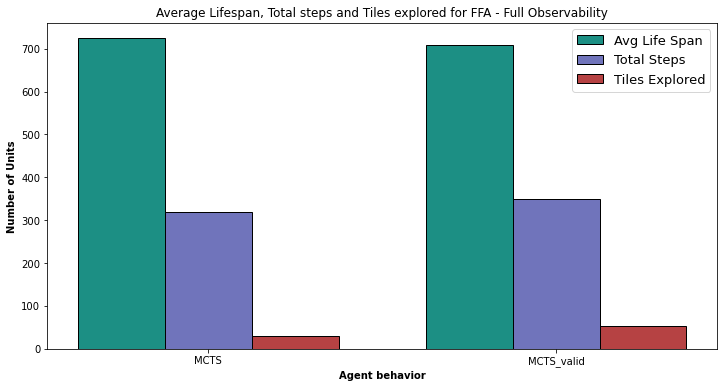

In [257]:
t = dx.loc[dx.player==13].groupby('agent')['dead_tick', 'total_steps', 'tiles_explored'].mean().reset_index()

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = t['dead_tick'].values
bars2 = t['total_steps'].values
bars3 = t['tiles_explored'].values
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


plt.figure(figsize=(12, 6))
plt.title('Average Lifespan, Total steps and Tiles explored for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='Avg Life Span')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='Total Steps')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='Tiles Explored')


# Add xticks on the middle of the group bars
plt.xlabel('Agent behavior', fontweight='bold')
plt.ylabel('Number of Units', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars1))], ['MCTS', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

# Environment Learning


In [263]:
dd = df.loc[df.agent.isin(['mcts', 'mcts_safe', 'mcts_obs'])]

In [270]:
dx = dd.loc[dd['mode']=='ffa_2']

In [271]:
dx['player'] = dx['player'].astype('category')
dx['agent'] = dx['agent'].astype('category')
dx['mode'] = dx['mode'].astype('category')

<ipython-input-271-49b1f2a833fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['player'] = dx['player'].astype('category')
<ipython-input-271-49b1f2a833fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['agent'] = dx['agent'].astype('category')
<ipython-input-271-49b1f2a833fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

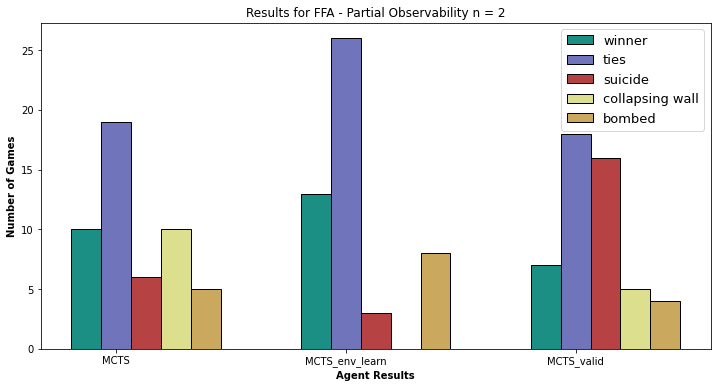

In [273]:
t = dx.loc[dx.player==13].groupby(['agent', 'death_how'])['game_no'].count().reset_index()

# set width of bars
barWidth = 0.13
 
# set heights of bars
bars1 = t.loc[t.death_how=='winner', 'game_no'].values # winner
bars2 = t.loc[t.death_how=='tie', 'game_no'].values
bars3 = t.loc[t.death_how=='suicide', 'game_no'].values
bars4 = t.loc[t.death_how=='collapsing_wall', 'game_no'].values
bars5 = t.loc[t.death_how=='bombed', 'game_no'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))
plt.title('Results for FFA - Partial Observability n = 2')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='winner')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='ties')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='suicide')
plt.bar(r4, bars4, color='#dcdf8d', width=barWidth, edgecolor='black', label='collapsing wall')
plt.bar(r5, bars5, color='#caa85d', width=barWidth, edgecolor='black', label='bombed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Results', fontweight='bold')
plt.ylabel('Number of Games', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MCTS', 'MCTS_env_learn', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

# Team

In [276]:
dd = df.loc[df.agent.isin(['mcts', 'mcts_safe', 'mcts_om'])]

In [284]:
dx = dd.loc[dd['mode']=='team_-1']

In [285]:
dx['player'] = dx['player'].astype('category')
dx['agent'] = dx['agent'].astype('category')
dx['mode'] = dx['mode'].astype('category')

<ipython-input-285-49b1f2a833fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['player'] = dx['player'].astype('category')
<ipython-input-285-49b1f2a833fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['agent'] = dx['agent'].astype('category')
<ipython-input-285-49b1f2a833fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

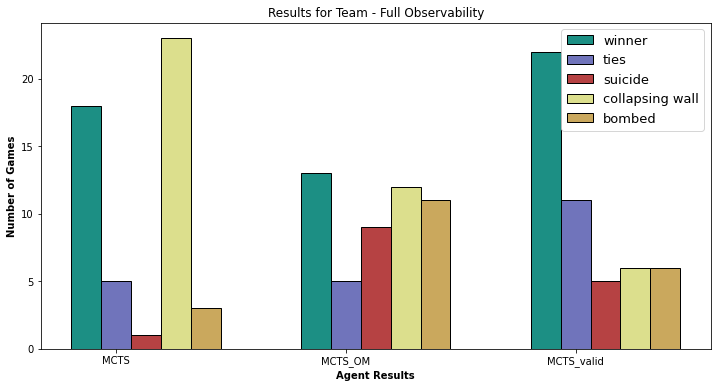

In [286]:
t = dx.loc[dx.player==13].groupby(['agent', 'death_how'])['game_no'].count().reset_index()

# set width of bars
barWidth = 0.13
 
# set heights of bars
bars1 = t.loc[t.death_how=='winner', 'game_no'].values # winner
bars2 = t.loc[t.death_how=='tie', 'game_no'].values
bars3 = t.loc[t.death_how=='suicide', 'game_no'].values
bars4 = t.loc[t.death_how=='collapsing_wall', 'game_no'].values
bars5 = t.loc[t.death_how=='bombed', 'game_no'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))
plt.title('Results for Team - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='winner')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='ties')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='suicide')
plt.bar(r4, bars4, color='#dcdf8d', width=barWidth, edgecolor='black', label='collapsing wall')
plt.bar(r5, bars5, color='#caa85d', width=barWidth, edgecolor='black', label='bombed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Results', fontweight='bold')
plt.ylabel('Number of Games', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MCTS', 'MCTS_OM', 'MCTS_valid'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()

# Final

In [292]:
dd = df.loc[df.agent.isin(['mcts', 'mcts_safe', 'mcts_obs', 'mcts_om', 'mcts_safe_obs'])]

In [358]:
dx = dd.loc[dd['mode']=='ffa_-1']

In [359]:
dx['player'] = dx['player'].astype('category')
dx['agent'] = dx['agent'].astype('category')
dx['mode'] = dx['mode'].astype('category')

<ipython-input-359-49b1f2a833fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['player'] = dx['player'].astype('category')
<ipython-input-359-49b1f2a833fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['agent'] = dx['agent'].astype('category')
<ipython-input-359-49b1f2a833fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [360]:
dx.loc[dx.player==13].groupby(['agent', 'death_how'])['game_no'].count().reset_index()

,agent,death_how,game_no
0,mcts,bombed,5
1,mcts,collapsing_wall,19
2,mcts,suicide,4
3,mcts,tie,12
4,mcts,winner,10
5,mcts_om,bombed,4
6,mcts_om,collapsing_wall,15
7,mcts_om,suicide,4
8,mcts_om,tie,25
9,mcts_om,winner,2


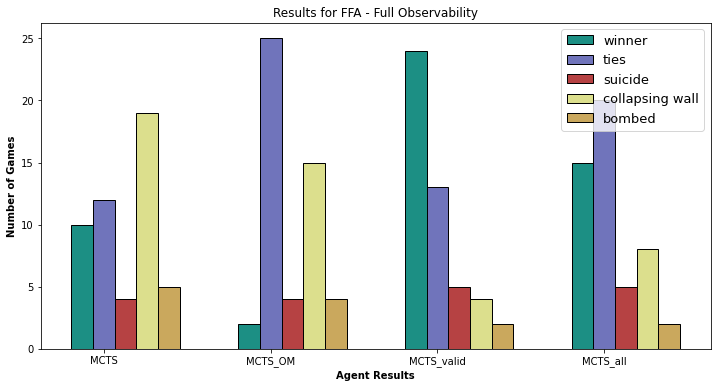

In [361]:
t = dx.loc[dx.player==13].groupby(['agent', 'death_how'])['game_no'].count().reset_index()

# set width of bars
barWidth = 0.13
 
# set heights of bars
bars1 = t.loc[t.death_how=='winner', 'game_no'].values # winner
bars2 = t.loc[t.death_how=='tie', 'game_no'].values
bars3 = t.loc[t.death_how=='suicide', 'game_no'].values
bars4 = t.loc[t.death_how=='collapsing_wall', 'game_no'].values
bars5 = t.loc[t.death_how=='bombed', 'game_no'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12, 6))
plt.title('Results for FFA - Full Observability')


# Make the plot
plt.bar(r1, bars1, color='#1c8f84', width=barWidth, edgecolor='black', label='winner')
plt.bar(r2, bars2, color='#7074bb', width=barWidth, edgecolor='black', label='ties')
plt.bar(r3, bars3, color='#b64243', width=barWidth, edgecolor='black', label='suicide')
plt.bar(r4, bars4, color='#dcdf8d', width=barWidth, edgecolor='black', label='collapsing wall')
plt.bar(r5, bars5, color='#caa85d', width=barWidth, edgecolor='black', label='bombed')


# Add xticks on the middle of the group bars
plt.xlabel('Agent Results', fontweight='bold')
plt.ylabel('Number of Games', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MCTS', 'MCTS_OM', 'MCTS_valid', 'MCTS_all'])
 
# Create legend & Show graphic
plt.legend(fancybox=True, fontsize=13)
plt.show()